In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, davies_bouldin_score

**Import Dataset**

In [ ]:
example = pd.read_csv('Diabetes Classification.csv')

print('Sample Data')
example.head()

Sample Data


,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


In [ ]:
dataset = pd.read_csv('Diabetes Classification-1.csv')

print('Sample Data')
dataset.head()

Sample Data


,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,1,25,1,100,5.7,0,0,1,1,0
1,55,0,30,2,120,6.4,1,1,0,0,1
2,65,1,35,2,140,7.1,1,1,0,0,1
3,75,0,40,2,160,7.8,1,1,0,0,1
4,40,1,20,1,80,5.0,0,0,1,1,0


Cek missing value dan tipe data

In [ ]:
dataset.isna().sum()

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

In [ ]:
dataset.dtypes

Age                             int64
Gender                          int64
BMI                             int64
Blood Pressure                  int64
FBS                             int64
HbA1c                         float64
Family History of Diabetes      int64
Smoking                         int64
Diet                            int64
Exercise                        int64
Diagnosis                       int64
dtype: object

Menentukan label dan atribut serta split data

In [ ]:
x = dataset.iloc[:, :10]
y = dataset['Diagnosis']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state=0)

**Decision Tree (classification)**

melatih model

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)

DecisionTreeClassifier()

nilai akurasi

In [ ]:
print('Decisoin Tree Accuracy: {:.3f}'.format(accuracy_score(yTest, dt.predict(xTest))))

Decisoin Tree Accuracy: 0.923


visualisasi model

[Text(0.5, 0.9166666666666666, 'x[9] <= 0.5\ngini = 0.323\nsamples = 89\nvalue = [71, 18]'),
 Text(0.3333333333333333, 0.75, 'x[6] <= 0.5\ngini = 0.449\nsamples = 53\nvalue = [35, 18]'),
 Text(0.16666666666666666, 0.5833333333333334, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.5, 0.5833333333333334, 'x[0] <= 54.0\ngini = 0.054\nsamples = 36\nvalue = [35, 1]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.6666666666666666, 0.4166666666666667, 'x[4] <= 130.0\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.5, 0.25, 'x[4] <= 110.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6666666666666666, 0.75, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]')]

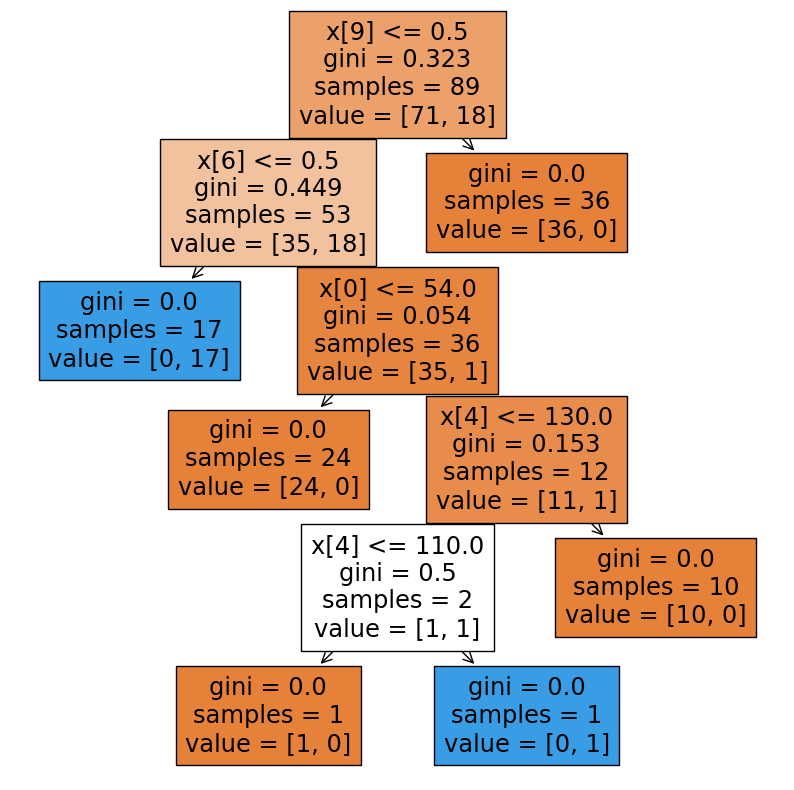

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt, filled=True)